In [25]:
import pandas as pd
from IPython.display import Image, display
import base64

import download_info as di
import top_stocks as ts
import process as p
import chart_combined as cc
import chart_available_dates as cad

api_key = '6669d7a6eb70f4.27564131'

# Top S&P 500 
tickers = "AAPL.US,MSFT.US,NVDA.US,AMZN.US,META.US,GOOGL.US,GOOG.US,LLY.US,JPM.US,BRK-B.US,V.US,PG.US,UNH.US,AVGO.US,JNJ.US"
tickers = tickers.split(',')

# Constants for the number of days before earnings and after dividend
days_after_dividend = 0  # Number of days after the dividend to buy
days_before_earnings = 0  # Number of days before earnings to sell

# Define the period of analysis
start_date = '2019-09-09'
end_date = '2024-09-09'

# Initial nominal investment in each stock
initial_investment = 1000

num_stocks = 10
num_pools = 10

downloaded_data = di.download_data(api_key, tickers, start_date, end_date)
downloaded_data = p.remove_tickers_without_dividends(downloaded_data)



Fetching data for AAPL.US...
Loading from cache: cache\AAPL.US\eod_AAPL.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json
Loading from cache: cache\AAPL.US\calendar_earnings\api_token_6669d7a6eb70f4_27564131_from_2019-09-09_to_2024-09-09_symbols_AAPL_US_fmt_json.json
Loading from cache: cache\AAPL.US\div_AAPL.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json
Loading from cache: cache\AAPL.US\historical-market-cap_AAPL.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json

Fetching data for MSFT.US...
Loading from cache: cache\MSFT.US\eod_MSFT.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json
Loading from cache: cache\MSFT.US\calendar_earnings\api_token_6669d7a6eb70f4_27564131_from_2019-09-09_to_2024-09-09_symbols_MSFT_US_fmt_json.json
Loading from cache: cache\MSFT.US\div_MSFT.US\from_2019-09-09_to_2024-09-09_api_token_6669d7a6eb70f4_27564131_fmt_json.json
Loading fr

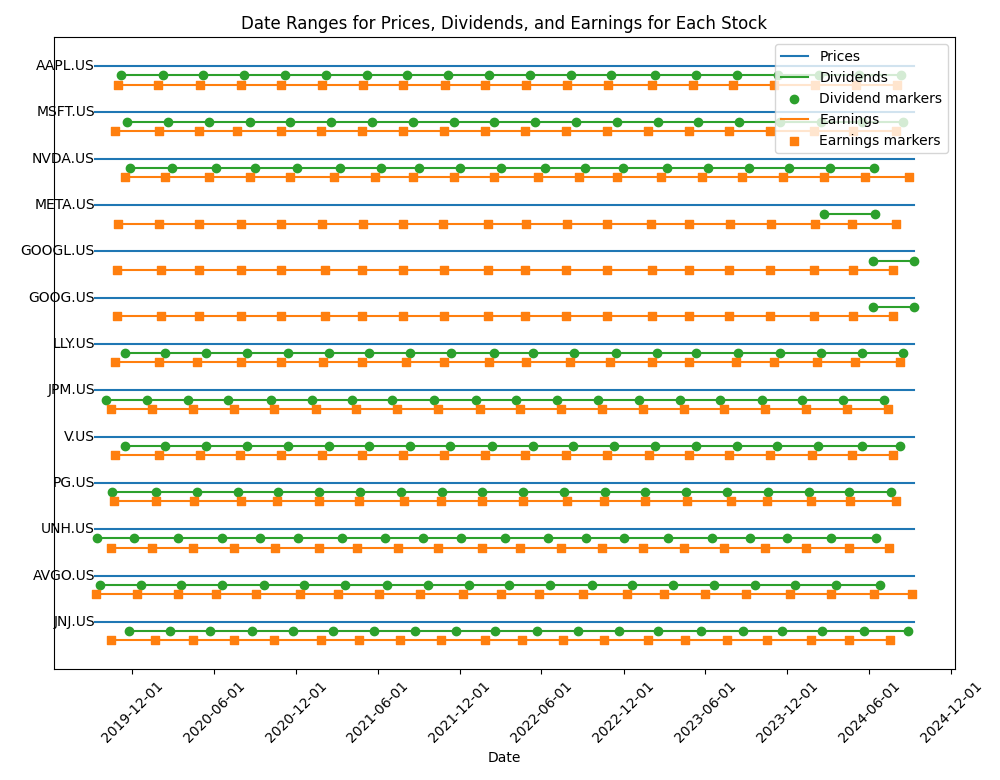

In [26]:
base64_image = cad.plot_stock_date_ranges(downloaded_data)
display(Image(data=base64.b64decode(base64_image), format='png'))

In [27]:
market_caps = p.process_market_caps(downloaded_data)
top_stocks_by_date = ts.create_top_stocks_by_date(market_caps, start_date, end_date, num_stocks)

No data for MSFT.US on or before 2019-09-09 00:00:00
No data for NVDA.US on or before 2019-09-09 00:00:00
No data for META.US on or before 2019-09-09 00:00:00
No data for GOOGL.US on or before 2019-09-09 00:00:00
No data for GOOG.US on or before 2019-09-09 00:00:00
No data for LLY.US on or before 2019-09-09 00:00:00
No data for JPM.US on or before 2019-09-09 00:00:00
No data for V.US on or before 2019-09-09 00:00:00
No data for PG.US on or before 2019-09-09 00:00:00
No data for UNH.US on or before 2019-09-09 00:00:00
No data for AVGO.US on or before 2019-09-09 00:00:00
No data for JNJ.US on or before 2019-09-09 00:00:00
No data for MSFT.US on or before 2019-09-10 00:00:00
No data for NVDA.US on or before 2019-09-10 00:00:00
No data for META.US on or before 2019-09-10 00:00:00
No data for GOOGL.US on or before 2019-09-10 00:00:00
No data for GOOG.US on or before 2019-09-10 00:00:00
No data for LLY.US on or before 2019-09-10 00:00:00
No data for JPM.US on or before 2019-09-10 00:00:00
No

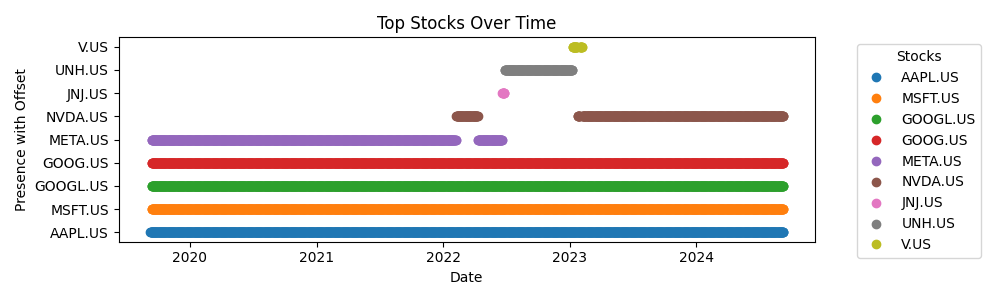

                                                     Stock
Date                                                      
2019-09-09                                       [AAPL.US]
2019-09-10                                       [AAPL.US]
2019-09-11                                       [AAPL.US]
2019-09-12                                       [AAPL.US]
2019-09-13  [MSFT.US, AAPL.US, GOOGL.US, GOOG.US, META.US]
...                                                    ...
2024-09-05  [AAPL.US, MSFT.US, NVDA.US, GOOG.US, GOOGL.US]
2024-09-06  [AAPL.US, MSFT.US, NVDA.US, GOOG.US, GOOGL.US]
2024-09-07  [AAPL.US, MSFT.US, NVDA.US, GOOG.US, GOOGL.US]
2024-09-08  [AAPL.US, MSFT.US, NVDA.US, GOOG.US, GOOGL.US]
2024-09-09  [AAPL.US, MSFT.US, NVDA.US, GOOG.US, GOOGL.US]

[1828 rows x 1 columns]


In [28]:
plot_top_stocks_base64 = ts.chart_top_stocks(top_stocks_by_date)
display(Image(data=base64.b64decode(plot_top_stocks_base64), format='png'))
print(top_stocks_by_date)

In [29]:
investment_results, free_capital_errors = p.process(downloaded_data, top_stocks_by_date, days_after_dividend, days_before_earnings, initial_investment, num_pools)

print(free_capital_errors)

2019-11-07: Bought: AAPL.US, Pool: 0, Investment: $1000.00
2019-11-20: Bought: MSFT.US, Pool: 1, Investment: $1000.00
2020-01-28: Sold: AAPL.US, Pool: 0, Gain: $224.57, Total Return: $1224.57
2020-01-29: Sold: MSFT.US, Pool: 1, Gain: $123.11, Total Return: $1123.11
2020-02-07: Bought: AAPL.US, Pool: 0, Investment: $1224.57
2020-02-19: Bought: MSFT.US, Pool: 1, Investment: $1123.11
2020-04-29: Sold: MSFT.US, Pool: 1, Gain: $-59.07, Total Return: $1064.04
2020-04-30: Sold: AAPL.US, Pool: 0, Gain: $-100.37, Total Return: $1124.20
2020-05-08: Bought: AAPL.US, Pool: 0, Investment: $1124.20
2020-05-20: Bought: MSFT.US, Pool: 1, Investment: $1064.04
2020-07-22: Sold: MSFT.US, Pool: 1, Gain: $149.53, Total Return: $1213.57
2020-07-30: Sold: AAPL.US, Pool: 0, Gain: $270.53, Total Return: $1394.73
2020-08-07: Bought: AAPL.US, Pool: 0, Investment: $1394.73
2020-08-19: Bought: MSFT.US, Pool: 1, Investment: $1213.57
2020-10-27: Sold: MSFT.US, Pool: 1, Gain: $20.54, Total Return: $1234.11
2020-10-29

In [30]:
base64_image = cc.chart_free_capital_errors(free_capital_errors, start_date, end_date)
if base64_image:
    display(Image(data=base64.b64decode(base64_image), format='png'))
else:
    print("No free capital errors to display.")


No free capital errors to display.


In [31]:
import pandas as pd

# Set the display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Disable wrapping to new lines
pd.set_option('display.max_colwidth', None)  # Don't truncate column contents

# Convert the investment_results dictionary to a DataFrame
df = pd.DataFrame(investment_results)

# Print the DataFrame
print(df)

# Reset the display options if necessary (optional)
pd.reset_option('display.max_columns')
pd.reset_option('display.expand_frame_repr')
pd.reset_option('display.max_colwidth')



                     2019-09-09  2019-09-10  2019-09-11  2019-09-12  2019-09-13  2019-09-14  2019-09-15  2019-09-16  2019-09-17  2019-09-18  2019-09-19  2019-09-20  2019-09-21  2019-09-22  2019-09-23  2019-09-24  2019-09-25  2019-09-26  2019-09-27  2019-09-28  2019-09-29  2019-09-30  2019-10-01  2019-10-02  2019-10-03  2019-10-04  2019-10-05  2019-10-06  2019-10-07  2019-10-08  2019-10-09  2019-10-10  2019-10-11  2019-10-12  2019-10-13  2019-10-14  2019-10-15  2019-10-16  2019-10-17  2019-10-18  2019-10-19  2019-10-20  2019-10-21  2019-10-22  2019-10-23  2019-10-24  2019-10-25  2019-10-26  2019-10-27  2019-10-28  2019-10-29  2019-10-30  2019-10-31  2019-11-01  2019-11-02  2019-11-03  2019-11-04  2019-11-05  2019-11-06  2019-11-07   2019-11-08   2019-11-09   2019-11-10   2019-11-11   2019-11-12   2019-11-13   2019-11-14   2019-11-15   2019-11-16   2019-11-17   2019-11-18   2019-11-19   2019-11-20   2019-11-21   2019-11-22   2019-11-23   2019-11-24   2019-11-25   2019-11-26   2019-11-27 

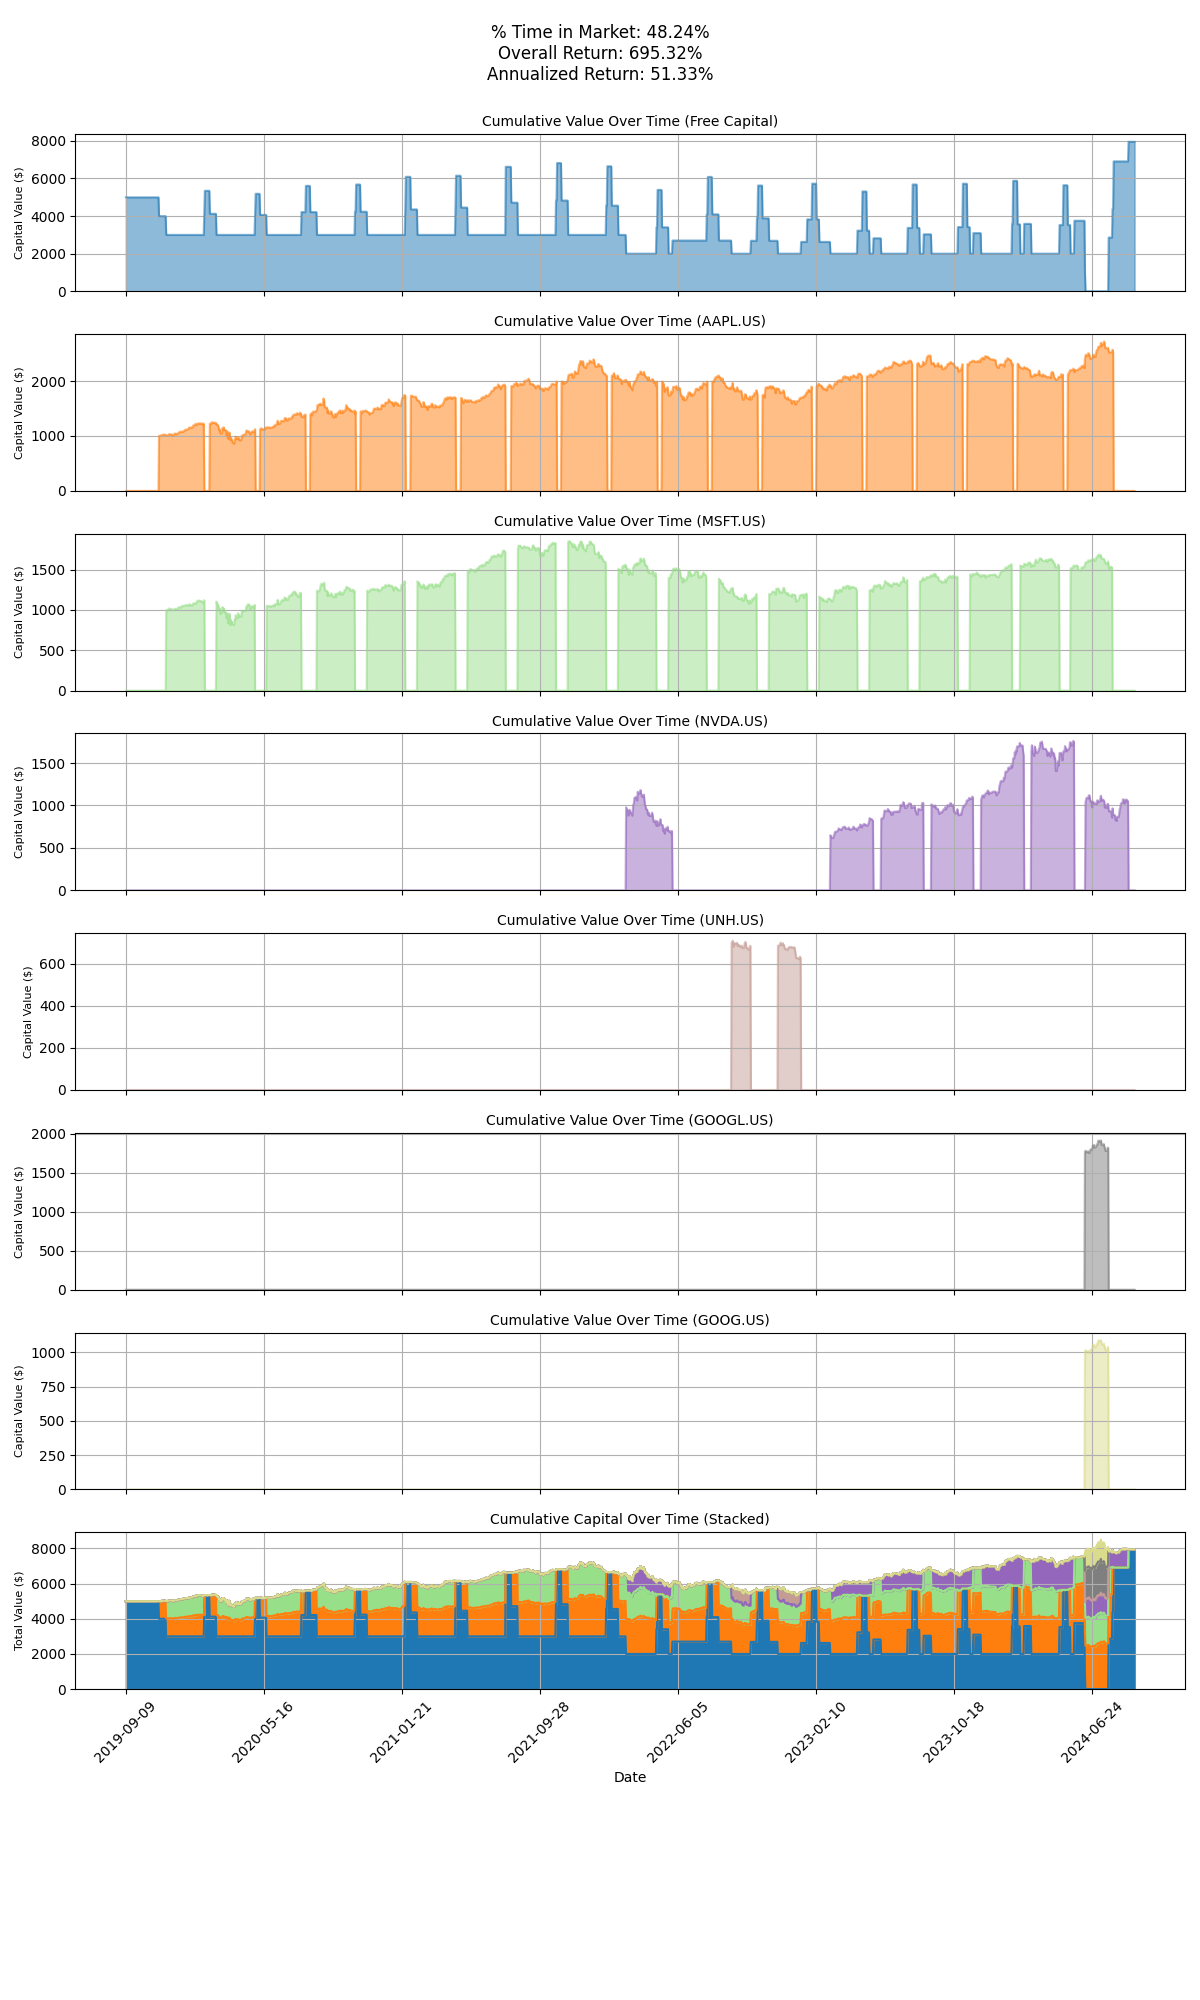

In [32]:
metrics = p.calculate_strategy_metrics(investment_results, start_date, end_date, initial_investment)
base64_image = cc.chart_combined(investment_results, metrics)
display(Image(data=base64.b64decode(base64_image), format='png'))